In [1]:
import os

In [2]:
os.chdir('c:\\Users\\ual-laptop\\Desktop\\Semester 1\\MIS 545\\Project')

In [3]:
import pandas as pd

In [4]:
# read excel file to a dataframe called amazon_sale

amazon_sale = pd.read_excel('Amazon_Sale_Report.xlsx')


In [5]:
# display the first 5 rows of the dataframe

amazon_sale.head()


Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top   

  Size  ... currency  Amount    ship-city   ship-state  ship-postal-code  \
0    S  ...      INR  647.62       MUMBAI  MAHARASHTRA          400081.0   
1  3XL  ...      INR  406.00    BENGALURU    KARNATAKA          560085.0   
2   XL  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3    L  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4  3XL  ...      INR  574.00      CHENNAI   TAMIL NADU          600073.0   

  ship-country                                      promotion-ids    B2B  \
0           IN                                                NaN  False   
1           IN  Amazon PLCC Free-Financing Universal Merchant ...  False   
2           IN       IN Core Free Shipping 2015/04/08 23-48-5-108   True   
3           IN                                                NaN  False   
4           IN                                                NaN  False   

  fulfilled-by Unnamed: 22  
0    Easy Ship         NaN  
1    Easy Ship         NaN  
2          NaN         NaN  
3    Easy Ship         NaN  
4          NaN         NaN  

[5 rows x 23 columns]

In [6]:
# make a copy of the dataframe

amazon_sale_copy = amazon_sale.copy()


In [7]:
# keep ONLY the following columns: 'Order ID', 'Date', 'Status', 'Style', 'Qty'

amazon_sale = amazon_sale[['Order ID', 'Date', 'Status', 'Style','SKU', 'Qty']]

In [8]:
# display the first 5 rows of the dataframe

amazon_sale.head()

Order ID       Date                        Status    Style  \
0  405-8078784-5731545 2022-04-30                     Cancelled   SET389   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer  JNE3781   
2  404-0687676-7273146 2022-04-30                       Shipped  JNE3371   
3  403-9615377-8133951 2022-04-30                     Cancelled    J0341   
4  407-1069790-7240320 2022-04-30                       Shipped  JNE3671   

               SKU  Qty  
0   SET389-KR-NP-S    0  
1  JNE3781-KR-XXXL    1  
2    JNE3371-KR-XL    1  
3       J0341-DR-L    0  
4  JNE3671-TU-XXXL    1

In [9]:
# remove the rows with Status = 'Cancelled'

amazon_sale = amazon_sale[amazon_sale['Status'] != 'Cancelled']


In [10]:
# display the first 5 rows of the dataframe

amazon_sale.head()

Order ID       Date                        Status    Style  \
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer  JNE3781   
2  404-0687676-7273146 2022-04-30                       Shipped  JNE3371   
4  407-1069790-7240320 2022-04-30                       Shipped  JNE3671   
5  404-1490984-4578765 2022-04-30                       Shipped   SET264   
6  408-5748499-6859555 2022-04-30                       Shipped    J0095   

               SKU  Qty  
1  JNE3781-KR-XXXL    1  
2    JNE3371-KR-XL    1  
4  JNE3671-TU-XXXL    1  
5  SET264-KR-NP-XL    1  
6      J0095-SET-L    1

In [11]:
# remove the space in the column names

amazon_sale.columns = amazon_sale.columns.str.replace(' ', '_')

In [12]:
# display the first 5 rows of the dataframe

amazon_sale.head()

Order_ID       Date                        Status    Style  \
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer  JNE3781   
2  404-0687676-7273146 2022-04-30                       Shipped  JNE3371   
4  407-1069790-7240320 2022-04-30                       Shipped  JNE3671   
5  404-1490984-4578765 2022-04-30                       Shipped   SET264   
6  408-5748499-6859555 2022-04-30                       Shipped    J0095   

               SKU  Qty  
1  JNE3781-KR-XXXL    1  
2    JNE3371-KR-XL    1  
4  JNE3671-TU-XXXL    1  
5  SET264-KR-NP-XL    1  
6      J0095-SET-L    1

In [13]:
amazon_sale.to_csv('Amazon_Sale_Report_Cleaned.csv', index=False)

In [14]:
# Aggregate data to find number of transactions per product (SKU)
product_transactionsdata = amazon_sale['SKU'].value_counts()

In [15]:
# Threshold for popularity
threshold = product_transactionsdata.median()

In [16]:
# display threshold

threshold

7.0

In [17]:
# Binary target variable 'Is_Popular'
amazon_sale['Is_Popular'] = amazon_sale['SKU'].apply(lambda x: 1 if product_transactionsdata[x] > threshold else 0)


In [18]:
# display the first 5 rows of the dataframe

amazon_sale.head()


Order_ID       Date                        Status    Style  \
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer  JNE3781   
2  404-0687676-7273146 2022-04-30                       Shipped  JNE3371   
4  407-1069790-7240320 2022-04-30                       Shipped  JNE3671   
5  404-1490984-4578765 2022-04-30                       Shipped   SET264   
6  408-5748499-6859555 2022-04-30                       Shipped    J0095   

               SKU  Qty  Is_Popular  
1  JNE3781-KR-XXXL    1           1  
2    JNE3371-KR-XL    1           1  
4  JNE3671-TU-XXXL    1           1  
5  SET264-KR-NP-XL    1           1  
6      J0095-SET-L    1           1

In [19]:
from sklearn.preprocessing import LabelEncoder

le_style = LabelEncoder()
le_sku = LabelEncoder()
amazon_sale['Style_Encoded'] = le_style.fit_transform(amazon_sale['Style'])
amazon_sale['SKU_Encoded'] = le_sku.fit_transform(amazon_sale['SKU'])

In [20]:
# display the first 5 rows of the dataframe

amazon_sale.head()


Order_ID       Date                        Status    Style  \
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer  JNE3781   
2  404-0687676-7273146 2022-04-30                       Shipped  JNE3371   
4  407-1069790-7240320 2022-04-30                       Shipped  JNE3671   
5  404-1490984-4578765 2022-04-30                       Shipped   SET264   
6  408-5748499-6859555 2022-04-30                       Shipped    J0095   

               SKU  Qty  Is_Popular  Style_Encoded  SKU_Encoded  
1  JNE3781-KR-XXXL    1           1            845         4387  
2    JNE3371-KR-XL    1           1            531         2596  
4  JNE3671-TU-XXXL    1           1            752         3790  
5  SET264-KR-NP-XL    1           1           1230         6207  
6      J0095-SET-L    1           1            179          650

In [21]:
# Feature and target variables

features = amazon_sale[['Style_Encoded', 'SKU_Encoded', 'Qty']]
target = amazon_sale['Is_Popular']

In [22]:
# Split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [23]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Predictions and evaluation

from sklearn.metrics import classification_report, accuracy_score

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [62]:
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{report}")

Accuracy: 0.9964526187355959

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5072
           1       1.00      1.00      1.00     39186

    accuracy                           1.00     44258
   macro avg       1.00      0.99      0.99     44258
weighted avg       1.00      1.00      1.00     44258



In [25]:
from sklearn.tree import export_graphviz
from six import StringIO  

In [32]:
features

Style_Encoded  SKU_Encoded  Qty
1                 845         4387    1
2                 531         2596    1
4                 752         3790    1
5                1230         6207    1
6                 179          650    1
...               ...          ...  ...
128970            772         3906    1
128971           1346         6990    1
128972            235          979    1
128973            118          402    1
128974            109          336    1

[110643 rows x 3 columns]

In [35]:
# display the decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
 
# Assuming X_train is your training dataset
feature_names = X_train.columns.tolist()  # Replace with your actual feature names
 
# Display the decision tree
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.404566 to fit



In [36]:
#prune the tree
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

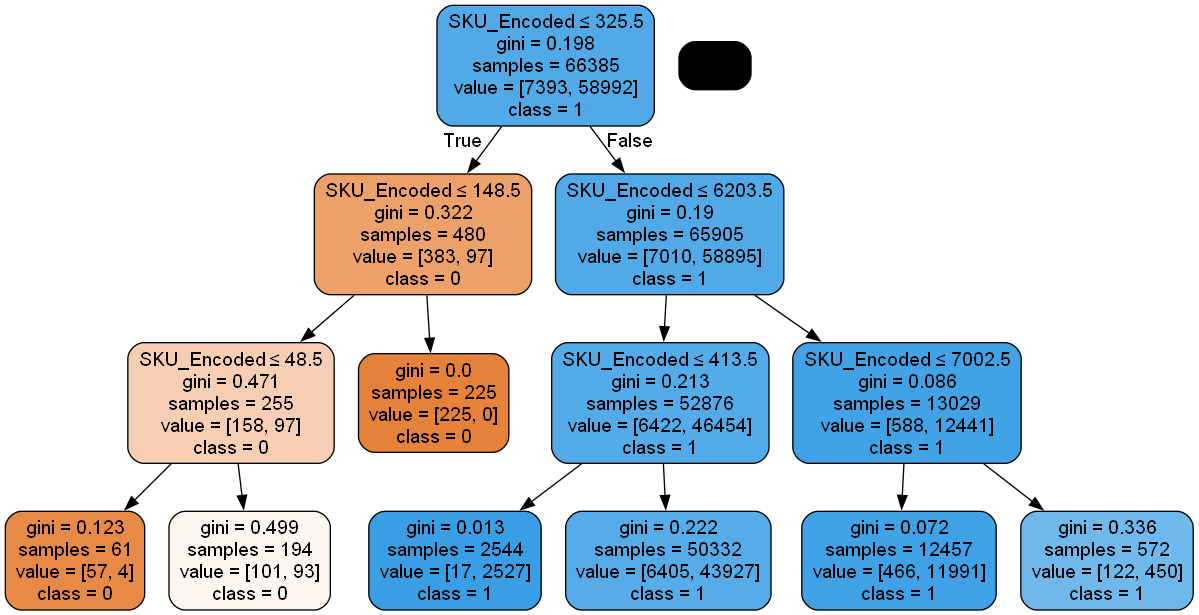

In [37]:
#display the decision tree
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
